In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The Titanic dataset

Source: https://www.kaggle.com/c/titanic/data

Read the dataframe into a variable called titanic

In [2]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Drop the 'Cabin' for now. 

The problem with Cabin is it has a lot of missing values. We'll see how to handle it later.

In [3]:
# your code here
titanic = titanic.drop('Cabin', axis=1)
titanic.shape

(891, 11)

# Count the number of missing on the dataset

After counting the number of missings, drop the them. We'll come back at them later.

In [4]:
titanic = titanic.dropna(subset=['Age'])

In [5]:
# your code here
titanic.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Embarked       712
dtype: int64

In [6]:
titanic = titanic.dropna(subset=['Embarked'])

Check how much data we've dropped. And check the number of missings in the dataset again just to check if you droped it correctly.

In [8]:
# your code here
titanic.count()

PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

# Check some statistics of the dataset

Use `.describe()` on the resulting dataset to check some patterns on the numerical columns

In [9]:
# your code here
titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,712.0,448.589888,258.683191,1.00,222.75,445.00000,677.25,891.0000
Survived,712.0,0.404494,0.491139,0.00,0.00,0.00000,1.00,1.0000
Pclass,712.0,2.240169,0.836854,1.00,1.00,2.00000,3.00,3.0000
Age,712.0,29.642093,14.492933,0.42,20.00,28.00000,38.00,80.0000
SibSp,712.0,0.514045,0.930692,0.00,0.00,0.00000,1.00,5.0000
Parch,712.0,0.432584,0.854181,0.00,0.00,0.00000,1.00,6.0000
Fare,712.0,34.567251,52.938648,0.00,8.05,15.64585,33.00,512.3292


What can you conclude from that? Check for example the average of survivals, the minimum and maximum Ages.

In [10]:
# your code here
# The average survivors was approximately 40%.
# The average age of passengers was 28. The oldest one was 80 and the youngest was a 5 month old baby.
# The maximum ticket price was $512.

# Visualizing relationships

Try to use a scatterplot on the dataframe columns 'Age' vs 'Survived' to see if you can have some insights

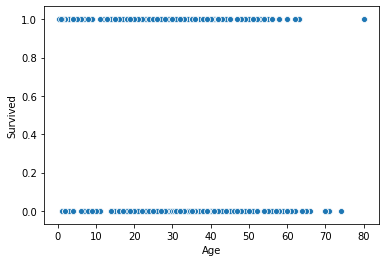

In [11]:
# your code here
sns.scatterplot(titanic.Age, titanic.Survived)

Now do the same for the columns 'Fare' and 'Survived'

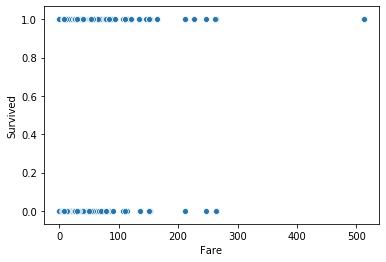

In [12]:
# your code here
sns.scatterplot(titanic.Fare, titanic.Survived)

# Is there any better visualization technique to handle binary data? If so, use it to try to understand the effect of Age in the variable Survived

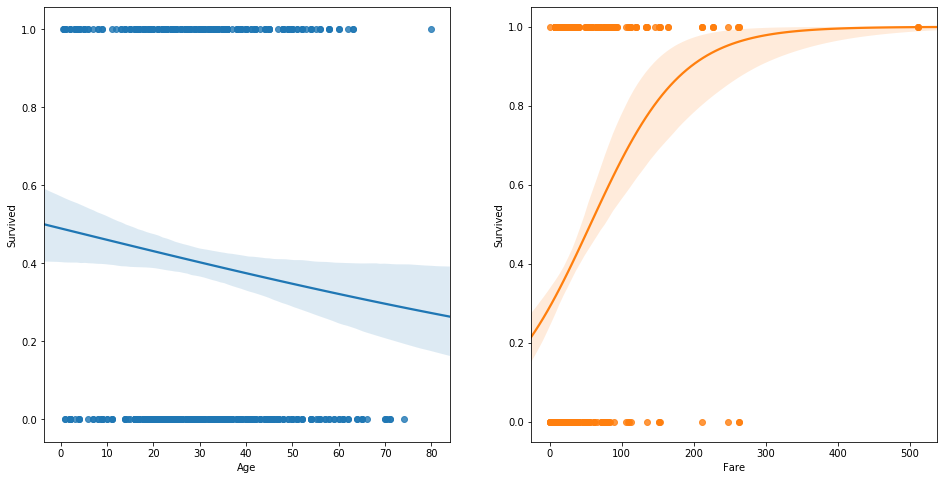

In [104]:
# your code here
fig, ax = plt.subplots(1,2, figsize=(16,8))
sns.regplot(titanic.Age, titanic.Survived, logistic=True, ax= ax[0])
sns.regplot(titanic.Fare, titanic.Survived, logistic=True, ax= ax[1])

# Cross Tab

Sometimes the plots above can reveal some important insights - specially if you have used some kind of, however, a better way to obtain these insights would be to use the `pd.crosstab()` 
function. Use it to explore the relations between `Age` and `Survived`. 

In [58]:
# your code here
pd.crosstab(titanic.Age,titanic.Survived).T

Age,0.42,0.67,0.75,0.83,0.92,1.00,2.00,3.00,4.00,5.00,...,62.00,63.00,64.00,65.00,66.00,70.00,70.50,71.00,74.00,80.00
Survived,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,2,7,1,3,0,...,2,0,2,3,1,2,1,2,1,0
1,1,1,2,2,1,5,3,5,7,4,...,1,2,0,0,0,0,0,0,0,1


Now perform the same operation for `Pclass` and `Survived`

In [59]:
# your code here
pd.crosstab(titanic.Pclass,titanic.Survived).T

Pclass,1,2,3
Survived,,,
0,64,90,270
1,120,83,85


What can you infer from that?

In [ ]:
# your code here
# The youngest survived more than the oldest.
# First class passengers survived more 

# Correlations

Can you infer the same using a correlation table and a heatmap?

1. Correlation dataframe


In [60]:
# your code here
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


2. Correlation Heatmap

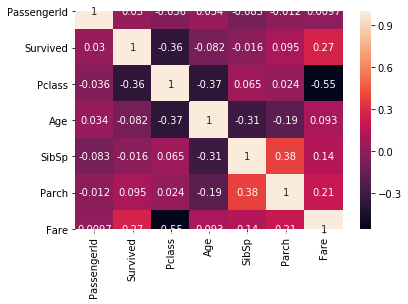

In [70]:
# your code here
sns.heatmap(titanic.corr(), annot= True)

Do you think age is linearly related to the variable Survived? Do you think this variable will be important in our models?

In [ ]:
# your code here
# There is negative correlation between Age and survivors. It will certainly be important

# Plot the distribution of the Age variable for each category of the `Survived` variable in the same plot. 

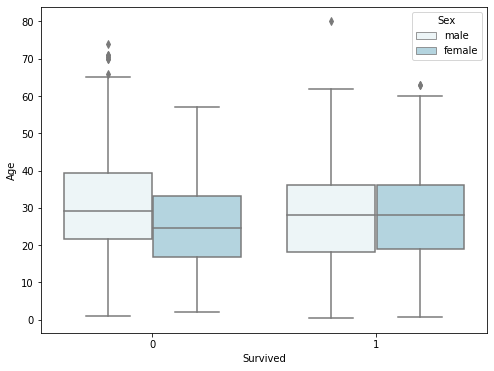

In [96]:
# your code here
fig, ax = plt.subplots(1,1, figsize=(8,6), sharey=True)
sns.boxplot(titanic['Survived'], titanic['Age'],hue= titanic['Sex'], color = 'lightblue')

# Now try to plot the same distribution but break the group into 
1. Survived, less than 18 years old male 
2. NOT Survived, less than 18 years old male 

And plot their `Age` distributions in the same graph.

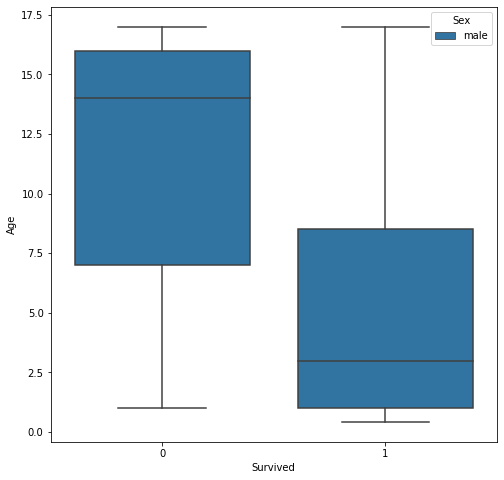

In [101]:
# your code here
under_age = titanic.query('Age < 18')
male_underage = under_age.query('Sex == "male"')
fig, ax = plt.subplots(1,1, figsize=(8,8), sharey=True)
sns.boxplot(male_underage['Survived'], male_underage['Age'], hue= male_underage['Sex'])

Do you understand this graph? What can you conclude about the variable Age? Is it important now? How does this relate to `Age`'s linear correlation coefficient? 

In [102]:
# your code here
# Age is a very important variable since male children had a higher survival rate than male teenagers.

# For these groups above, calculate their average of survivalness.

You probably observed a discrimination of Surivavalness around 9 years old. For this exercise, you need to calculate the average of survivalness for each of these groups to survive. Again, filter the dataset into two subgroups:

1. Males with ages less than 9
2. Males with ages greater than 9 and less than 18

What are their average survival?

In [124]:
# your code here
under_9 = male_underage.query('Age < 9')
under_9_survived = under_9.query('Survived == 1')
above_9 = male_underage.query('Age >= 9')
above_9_survived = above_9.query('Survived == 1')
x = under_9_survived['Age'].mean()
y = above_9_survived['Age'].mean()
print(f'The average survival age for children under 9 is: {round(x,2)}. \nThe average survival age for children above 9 is: {round(y,2)}.')


The average survival age for children under 9 is: 2.51. 
The average survival age for children above 9 is: 12.33.


*To think:* If you were told then, to predict if a 15 year old man have survived, what would you predict?

# Prepare data for our first model

### Let's start simple. 

First create a variable named `X` containing the variables `['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']`. 


In [125]:
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Also create a pandas series containing the variable Survived. Store it in the variable `y`.

In [126]:
y = titanic['Survived']

# Dummify your dataset

Create a dummy version of your `X` dataset. After obtaining the dummification of your features, you'll observe that some  You won't need both of them, so you could use the argument `drop_first=True` to get rid of the first dummy.

In [127]:
X = pd.get_dummies(X, drop_first=True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


# Prepare your validation strategy

We'll use the validation strategy called `holdout`. For this strategy, the idea is to hide part of your dataframe to estimate the error on a data you haven't seen before. 

So you'll be able to use part of your dataset to train your model and then use the never-seen part of your dataset to have a good estimate of the error when the model goes to production.

## Separate your `X` dataset into a dataset called `X_train` and another called `X_test`. Of course, also create a pandas series containing `y_train` and `y_test`. 

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
392,3,28.0,2,0,7.9250,1,0,1
315,3,26.0,0,0,7.8542,0,0,1
881,3,33.0,0,0,7.8958,1,0,1
799,3,30.0,1,1,24.1500,0,0,1
525,3,40.5,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
266,3,16.0,4,1,39.6875,1,0,1
226,2,19.0,0,0,10.5000,1,0,1
333,3,16.0,2,0,18.0000,1,0,1
248,1,37.0,1,1,52.5542,1,0,1


# You'll be able to concat the `X_train` and `y_train`. Do the same for `X_test` and `y_test`. Put them into dataframes called `titanic_train` and `titanic_test`

In [136]:
titanic_train = pd.concat([X_train, y_train], axis=1)
titanic_test = pd.concat([X_test, y_test], axis=1)

# And store it on your own folder.

In [137]:
titanic_train.to_csv('titanic_train.csv', index=False)
titanic_test.to_csv('titanic_test.csv', index=False)